사용할 데이터는 유방암 데이터셋입니다. 종양의 여러 가지 feature를 바탕으로 암인 지 아닌 지를 알아맞히는 거죠. 머신러닝 모델은 전부 만들어두었으니, 우리가 오늘 배운 각종 preprocessing 방법을 사용해 정확도만 올리면 됩니다. valid dataset은 사용하지 않고, train-test dataset만 사용합니다. 정확도를 0.91 이상으로 올려보세요.

In [35]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer

cancer=load_breast_cancer()

In [150]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

In [52]:
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [183]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [184]:
df.isnull()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
324,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
325,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
326,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              328 non-null    float64
 1   mean texture             328 non-null    float64
 2   mean perimeter           328 non-null    float64
 3   mean area                328 non-null    float64
 4   mean smoothness          328 non-null    float64
 5   mean compactness         328 non-null    float64
 6   mean concavity           328 non-null    float64
 7   mean concave points      328 non-null    float64
 8   mean symmetry            328 non-null    float64
 9   mean fractal dimension   328 non-null    float64
 10  radius error             328 non-null    float64
 11  texture error            328 non-null    float64
 12  perimeter error          328 non-null    float64
 13  area error               328 non-null    float64
 14  smoothness error         3

In [23]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [125]:
for col in df.columns:
    print(f'skewness of {col} is {df[col].skew()}.')

skewness of mean radius is 0.9423795716730992.
skewness of mean texture is 0.6504495420828159.
skewness of mean perimeter is 0.9906504253930081.
skewness of mean area is 1.6457321756240424.
skewness of mean smoothness is 0.45632376481955844.
skewness of mean compactness is 1.1901230311980404.
skewness of mean concavity is 1.4011797389486722.
skewness of mean concave points is 1.1711800812336282.
skewness of mean symmetry is 0.7256089733641999.
skewness of mean fractal dimension is 1.3044888125755076.
skewness of radius error is 3.0886121663847574.
skewness of texture error is 1.646443808753053.
skewness of perimeter error is 3.443615202194899.
skewness of area error is 5.447186284898394.
skewness of smoothness error is 2.314450056636759.
skewness of compactness error is 1.9022207096378565.
skewness of concavity error is 5.110463049043661.
skewness of concave points error is 1.4446781446974786.
skewness of symmetry error is 2.1951328995478216.
skewness of fractal dimension error is 3.92

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


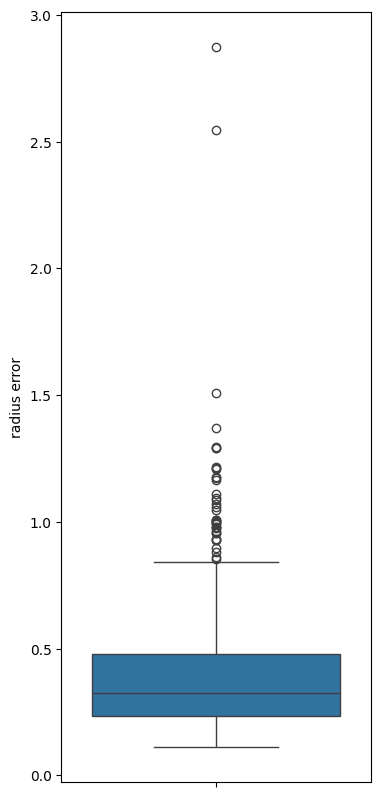

In [126]:
plt.figure(figsize=(4,10))
sns.boxplot(df['radius error'])
plt.show()

In [127]:
df['radius error'].skew()

3.0886121663847574

In [151]:
for col in df.columns:
    if df[col].skew() > 1:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3-Q1
        whisker_width = 1.5
        lower_whisker = Q1 - whisker_width*IQR
        upper_whisker = Q3 + whisker_width*IQR
        non_outliers = df[(df[col] > lower_whisker) & (df[col] < upper_whisker)]
        df = non_outliers.reset_index().iloc[:, 1:]

In [233]:
for col in df.columns:
    print(f'skewness of {col} is {df[col].skew()}.')

skewness of mean radius is 0.1197536676773184.
skewness of mean texture is 0.7980708123095024.
skewness of mean perimeter is 0.13056684255287393.
skewness of mean area is 0.5927445256195181.
skewness of mean smoothness is 0.1785154360746057.
skewness of mean compactness is 0.7204405819053692.
skewness of mean concavity is 1.3172409362936703.
skewness of mean concave points is 1.281740480282542.
skewness of mean symmetry is 0.34555676414648195.
skewness of mean fractal dimension is 0.43281480555369517.
skewness of radius error is 0.8373980033822244.
skewness of texture error is 0.6526562639572684.
skewness of perimeter error is 0.8268890873368605.
skewness of area error is 1.0332092437059788.
skewness of smoothness error is 0.5991134382727625.
skewness of compactness error is 0.9359294339073022.
skewness of concavity error is 1.116881872588475.
skewness of concave points error is 0.551606139987955.
skewness of symmetry error is 0.6950151526418465.
skewness of fractal dimension error is 

In [234]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler1 = StandardScaler()
scaler2 = MinMaxScaler()
for col in df.iloc[:, 1:]:
    value_array = np.array(df[col]).reshape(-1, 1)
    KstestResult = stats.kstest(value_array.flatten(), 'norm', args=(value_array.flatten().mean(), value_array.flatten().var()**0.5))
    if KstestResult.pvalue > 0.05:
        df[col] = pd.Series(scaler1.fit_transform(value_array).flatten())
    else:
        df[col] = pd.Series(scaler2.fit_transform(value_array).flatten())

In [235]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.491564,0.680987,0.632527,0.421232,2.209903,0.899578,0.460925,0.545579,2.268347,2.918966,...,1.234866,0.689537,1.144648,0.656902,2.000854,0.829145,0.459348,0.611876,0.962408,3.292426
1,1.750651,1.290690,1.646850,1.902839,-0.820264,0.293268,0.162352,0.302917,-0.909143,-0.869404,...,2.186289,1.706056,2.005773,0.910714,-0.435940,0.299940,0.250257,0.392253,0.411031,0.580574
2,1.657991,1.470312,1.727996,1.801101,-0.659872,0.500992,0.489075,0.488970,0.608251,-1.644789,...,1.136597,0.604532,1.235980,0.636336,-0.693529,0.392570,0.398285,0.440031,0.101994,-1.339360
3,1.020272,0.503895,1.000929,1.139464,0.545943,0.326184,0.363927,0.479398,-0.633253,-0.383439,...,2.132687,1.174774,1.979679,0.898676,1.022015,0.379408,0.499828,0.632717,0.591118,0.371288
4,0.398904,-0.955850,0.410187,0.343075,0.473561,0.383771,0.327953,0.435825,0.789007,-0.720375,...,0.363845,-0.883055,0.433568,0.470506,0.898372,0.355071,0.409949,0.506488,0.475507,-0.477385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,-1.372540,2.396251,-1.357981,-1.306973,-0.142507,0.354575,0.295226,0.249590,-0.599956,0.059330,...,-1.543468,1.888462,-1.532015,0.115770,0.609872,0.339426,0.343053,0.358907,-1.194186,0.430704
324,0.971216,1.149017,1.134820,0.954853,-0.600651,0.704314,0.506398,0.340565,-1.261140,0.102527,...,0.529115,0.535466,0.838036,0.492877,-1.234466,0.702245,0.628130,0.434526,-1.123040,0.183285
325,0.676884,2.279877,0.728279,0.572829,0.596940,0.577858,0.219587,0.392343,-0.866332,0.154363,...,0.448713,1.580319,0.466186,0.465991,-0.126833,0.477004,0.227444,0.412112,-1.140827,0.464402
326,2.066786,2.515156,2.101267,2.309119,-0.615456,0.514009,0.455266,0.483318,-0.614226,-0.975236,...,2.092486,1.748558,2.194960,0.884631,-0.652315,0.683123,0.583705,0.557609,-1.211972,0.020113


In [254]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=3)
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
print('모델의 정확도 :', round(dtc.score(X_test, y_test), 4))

모델의 정확도 : 0.9123
